# Assignment

## Summary of instructions

1. <u>Get Corpora:</u>  use pandas read_csv with sep='\t' to read in the following 2 files available from the us naval academy:
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/keyword-tweets.txt'
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/general-tweets.txt'
<br/> <span style="color:red" float:right>[1 point]</span>

2. <u>Combine to Corpus:</u> concatenate these 2 data sets into a single data frame called LabeledTweets that has 2 columns, named Sentiment and Tweet <span style="color:red" float:right>[1 point]</span>

3. <u>Rename Labels:</u> Replace sentiment labels 'POLIT': 1, 'NOT': 0; <span style="color:red" float:right>[0 point]</span>

4. <u>Clean Tweets:</u>
   1. remove all tokens that contain a "@". Remove the whole token, not just the character.
   2. remove all tokens that contain "http". Remove the whole token, not just the characters.
   3. **replace** (not remove) all punctuation marks with a space (" ")
   4. **replace** all numbers with a space
   5. **replace** all non ascii characters with a space
   7. convert all characters to lowercase
   8. strip extra whitespaces
   9. lemmatize tokens
   9. No need to remove stopwords because TfidfVectorizer will take care of that
<br/><span style="color:red" float:right>[9 point]</span>

5. <u>Create TF-IDF:</u> Use TfidfVectorizer from sklearn to prepare the data for machine learning.  Use max_features = 50;  <span style="color:red" float:right>[2 point]</span>

6. <u>Train Classifier:</u> Use sklearn LogisticRegression to train a model on the results on 75% of the data. <span style="color:red" float:right>[1 point]</span>

7. <u>Determine Accuracies:</u>  Determine the accuracy on the training data and the test data.   Determine the baseline accuracy. <span style="color:red" float:right>[1 point]</span>

8. <u>Relate number of features to accuracy:</u> Repeat steps 5, 6, and 7  with TfidfVectorizer max_features set to 1, 2, 5, 15, 50, 150, 500, 1500, 5000, 50000 and discuss your accuracies. <span style="color:red" float:right>[2 point]</span>

In [1]:
# Packages
# Basic Data Science packages
import pandas as pd
import numpy as np

# Basic text processing packages
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

# Basic Machine Learning packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Presentation
import matplotlib.pyplot as plt
%matplotlib inline

1. <u>Get Corpora:</u>  use `pandas` `read_csv` with `sep='\t'` to read in the following 2 files available from the us naval academy:
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/keyword-tweets.txt'
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/general-tweets.txt'
<br/> <span style="color:red" float:right>[1 point]</span>

Elaboration:  Read in the data directly from the files posted on the websites.  Alternately, first download the files and then read in the data from your local copies.  The result will be two dataframes with default column headers.

In [27]:
# Add code here
txtfiles = ['../../data/keyword-tweets.txt', '../../data/general-tweets.txt']
names = ['orig_label','context']
tweet_df = pd.read_csv(txtfiles[0],sep='\t',names=names)
other = pd.read_csv(txtfiles[1],sep='\t',names=names)


2. <u>Combine to Corpus:</u> concatenate these 2 data sets into a single data frame called `LabeledTweets` that has 2 columns, named `Sentiment` and `Tweet` <span style="color:red" float:right>[1 point]</span>

Elaboration:  Concatenate the two data frames.  Watch out that the indices are reset and are sequential from 0 to 4003.  After concatenation, rename the columns.

In [28]:
# Add code here
tweet_df = tweet_df.append(other,sort=False)


3. <u>Rename Labels:</u> Replace sentiment labels `'POLIT': 1, 'NOT': 0`; <span style="color:red" float:right>[0 point]</span>

Elaboration:  No need to cast the sentiment column to the category data type.  

In [29]:
# Add code here
tweet_df['label'] = tweet_df['orig_label'].transform(lambda x:1 if x == 'POLIT' else 0)
tweet_df.head()

,orig_label,context,label
0,POLIT,Global Voices Online Â» Alex Castro: A liberal...,1
1,POLIT,Do the Conservatives Have a Death Wish? http:/...,1
2,NOT,@MMFlint I've seen all of your movies and Capi...,0
3,POLIT,RT @AllianceAlert: * House Dems ask for civili...,1
4,POLIT,RT @AdamSmithInst Quote of the week: My politi...,1


4. <u>Clean Tweets:</u>
   1. remove all tokens that contain a "@". Remove the whole token, not just the character.
   2. remove all tokens that contain "http". Remove the whole token, not just the characters.
   3. **replace** (not remove) all punctuation marks with a space (" ")
   4. **replace** all numbers with a space
   5. **replace** all non ascii characters with a space
   7. convert all characters to lowercase
   8. strip extra whitespaces
   9. lemmatize tokens
   9. No need to remove stopwords because `TfidfVectorizer` will take care of that
<br/><span style="color:red" float:right>[9 point]</span>

Elaboration:  This task goes beyond our lecture and you will need to look online to find examples on how to accomplish the above cleanings.  I would make heavy use of string methods like:
- Does a string contain a substring?  Use `in`; example: `'@' in token`
- Does a string contain a number?  Use `isdigit()`; example: `char.isdigit()`

You can also use the regular expressions (regex) and its functions like `sub`.  Python's regular expression package is `re`.  Just like in class the cleaned tweets are added as a new column to `LabeledTweets`.  The new column could be called `clean_tweet`, like in class.  The presented order of the cleaning steps is probably not the best.  Establish your own order and justify your order.

### Text Cleaning Discussion
Add Comment Here


In [41]:
import nltk
nltk.download('wordnet')


from nltk.stem.wordnet import WordNetLemmatizer
import itertools

lemmatizer = WordNetLemmatizer()
# Add code here
def preprocess(text:str) -> str:
    # tokenize
    text = list(text.split())
    
    # A B
    text = filter(lambda x:'@' not in x and 'http' not in x, text)
    text= ' '.join(text)
    
    # C D E
    translateToSpace = {x for x in itertools.chain(string.punctuation,'0123456789','\t')}
    text = map(lambda x: ' ' if x in translateToSpace or ord(x) >= 128 else x.lower(), text)
    
    # tokenize
    text = ''.join(text)

    # G H
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())


tweet_df['clean_tweet'] = tweet_df['context'].map(preprocess)
tweet_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ayaskanti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,orig_label,context,label,clean_tweet
0,POLIT,Global Voices Online Â» Alex Castro: A liberal...,1,global voice online alex castro a liberal libe...
1,POLIT,Do the Conservatives Have a Death Wish? http:/...,1,do the conservative have a death wish
2,NOT,@MMFlint I've seen all of your movies and Capi...,0,i ve seen all of your movie and capitalism is ...
3,POLIT,RT @AllianceAlert: * House Dems ask for civili...,1,rt house dems ask for civility at town hall an...
4,POLIT,RT @AdamSmithInst Quote of the week: My politi...,1,rt quote of the week my political opinion lean...


5. <u>Create TF-IDF:</u> Use `TfidfVectorizer` from `sklearn` to prepare the data for machine learning.  Use `max_features = 50000`;  <span style="color:red" float:right>[2 point]</span>

Elaboration:  You can copy the example in lecture.  I would play with max_df, min_df, and sublinear_tf.  `fit_transform` is applied to the cleaned Tweets.

In [46]:
# Add code here
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, max_features = 50000, stop_words = 'english')
clean_texts = tweet_df['clean_tweet']
tf_idf_tweets = vectorizer.fit_transform(clean_texts)

tweet_df.head()

,orig_label,context,label,clean_tweet,tfidf
0,POLIT,Global Voices Online Â» Alex Castro: A liberal...,1,global voice online alex castro a liberal libe...,"(0, 3705)\t0.2742019638001817\n (0, 9685)\t..."
1,POLIT,Do the Conservatives Have a Death Wish? http:/...,1,do the conservative have a death wish,"(0, 3705)\t0.2742019638001817\n (0, 9685)\t..."
2,NOT,@MMFlint I've seen all of your movies and Capi...,0,i ve seen all of your movie and capitalism is ...,"(0, 3705)\t0.2742019638001817\n (0, 9685)\t..."
3,POLIT,RT @AllianceAlert: * House Dems ask for civili...,1,rt house dems ask for civility at town hall an...,"(0, 3705)\t0.2742019638001817\n (0, 9685)\t..."
4,POLIT,RT @AdamSmithInst Quote of the week: My politi...,1,rt quote of the week my political opinion lean...,"(0, 3705)\t0.2742019638001817\n (0, 9685)\t..."


6. <u>Train Classifier:</u> Use sklearn LogisticRegression to train a model on the results on 75% of the data. <span style="color:red" float:right>[1 point]</span>

Elaborate:  Just like in lecture use `train_test_split` from `sklearn` to split the vectorized features qlong with the target, `LabeledTweets.Sentiment`.  Fit a logistic regression using the resulting training data.  

In [49]:
# Add code here
X_train, X_test, y_train, y_test = train_test_split(tf_idf_tweets, tweet_df['label'], test_size = 800, random_state = 42)
print(type(X_train), X_train.shape)
lr = LogisticRegression()
lr.fit(X_train, y_train)

<class 'scipy.sparse.csr.csr_matrix'> (3204, 10209)


/home/ayaskanti/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

7. <u>Determine Accuracies:</u>  Determine the accuracy on the training data and the test data.   Determine the baseline accuracy. <span style="color:red" float:right>[1 point]</span>

Elaboration:  The only accuracy measure required is accuracy rate.  Accuracy rate is determined by correct predictions divided by all predictions.  In lecture these were called Train accuracy, Test accuracy, and Baseline accuracy.  The Baseline accuracy can be determinbed by taking the support of the larger class and dividing it by the total number of cases (tweets).  As we will discuss in a later lecture, only Test accuracy is a "real" accuracy.   

In [52]:
# Add code here
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.954119850187266
Test accuracy: 0.865
Baseline accuracy: 0.54125


8. <u>Relate number of features to accuracy:</u> Repeat steps 5, 6, and 7  with `TfidfVectorizer` `max_features` set to 1, 2, 5, 15, 50, 150, 500, 1500, 5000, 50000 and discuss your accuracies. <span style="color:red" float:right>[2 point]</span>

Elaboration:  Create a for-loop where `max_features` is 1, 2, 5, 15, 50, 150, 500, 1500, 5000, 50000.  Plot the training and test accuracies vs number of features on a log plot.  Discuss the behavior of the graphs.

/home/ayaskanti/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


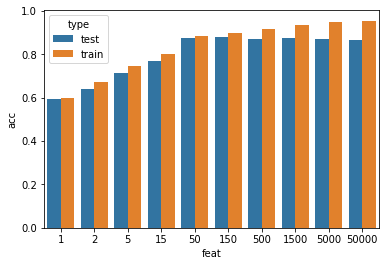

In [93]:
import seaborn as sea
from operator import itemgetter

# Add code here
def modelMaker(max_features):
    vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, max_features = max_features, stop_words = 'english')
    clean_texts = tweet_df['clean_tweet']
    tf_idf_tweets = vectorizer.fit_transform(clean_texts)

    #tweet_df.head()
    X_train, X_test, y_train, y_test = train_test_split(tf_idf_tweets, tweet_df['label'], test_size = 800, random_state = 42)
    #print(type(X_train), X_train.shape)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    train_results = lr.predict(X_train)
    test_results = lr.predict(X_test)

    train_acc = np.mean(y_train == train_results)
    test_acc = np.mean(y_test == test_results)

    return (train_acc, test_acc )#, np.max([np.mean(y_test == 1), np.mean(y_test == 0)])]

featList = [1, 2, 5, 15, 50, 150, 500, 1500, 5000, 50000]
trainTest = [modelMaker(x) for x in featList]
trainList= list(map(itemgetter(0),trainTest))
testList= list(map(itemgetter(1),trainTest))

trainData= pd.DataFrame(data={'feat':featList,'acc':trainList,'type':'train'})
testData= pd.DataFrame(data={'feat':featList,'acc':testList,'type':'test'})

pltdata = testData.append(trainData)
pltdata.head()
sea.barplot(data=pltdata,x='feat',y='acc',hue='type')

### Discuss accuracies in respect to number of features
When we used more feature , the accuracy on training set increased.

But unlike training set, by using features upto 150 we got best test-accuracy and after that it declined.

This means that more feature does not always give better model, after certain point it plateau.


# End of assignment